## State Estimation - Static Systems
Here we'll see how estimate the state of a static system by repeating multiple measurements and fusing them into a single information. In this case we need to measure the distance between a radar sensor and an object fixed in space

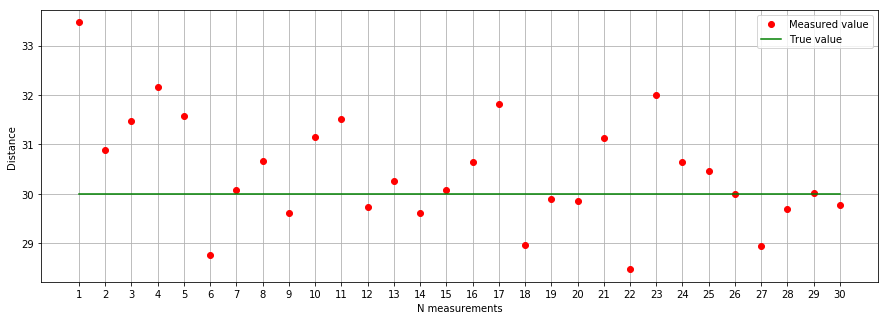

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

######## input data ###########
trueDistance = 30 # meters
oneSigma = 1 # meters
nMeasurements = 30

measuredDistance = trueDistance + oneSigma * np.random.randn(nMeasurements)
x = np.full(nMeasurements, trueDistance)

plt.plot(np.arange(1, nMeasurements+1, 1.0), measuredDistance, 'ro', label='Measured value')
plt.plot(np.arange(1, nMeasurements+1, 1.0), x, color='green', label='True value')
plt.xlabel('N measurements')
plt.ylabel('Distance')
plt.xticks(np.arange(1, nMeasurements+1, 1.0))
plt.grid(True)
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)

At the time of <i>n</i>th measurement the estimated value of the state is the average of all previously taken measurements:
### $$ \hat{x}_{n,n}= \frac{1}{n} \left( y_{1}+ y_{2}+ \ldots + y_{n-1}+ y_{n} \right) = \frac{1}{n} \sum _{n=1}^{n} \left( y_{n} \right) $$

$ {y}_{n}  $ is the value of the <i>n</i>th measurement

$ \hat{x}_{n,n} $ is the estimated value of the state at time <i>n</i> after taking the measurement $ {y}_{n}  $

It can be demnstrated that:

### $$ \hat{x}_{n,n}= \hat{x}_{n,n-1}+ \frac{1}{n} \left( y_{n}- \hat{x}_{n,n-1} \right) $$

We now use this formula to estimate the true distance

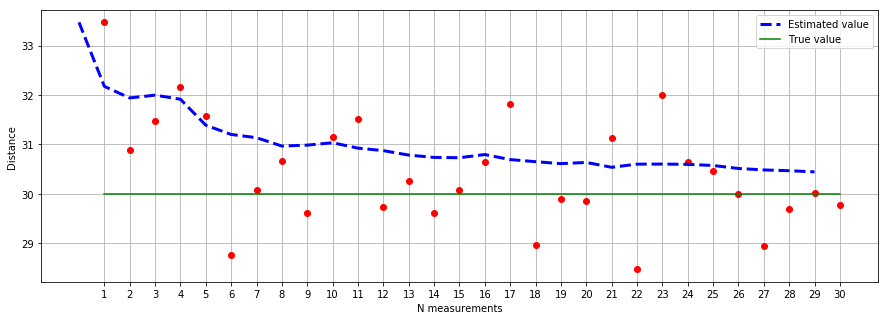

In [2]:
def update(prevEstimate, gain, measure):
    return prevEstimate + gain * (measure - prevEstimate)

######## input data ###########
initialGuess = 35

estimates = np.empty(nMeasurements)
nIndex = 1;
estimate = initialGuess
for m in measuredDistance:
    estimate = update(estimate, 1/nIndex, m)
    estimates[nIndex-1] = estimate
    nIndex = nIndex + 1
    
plt.plot(np.arange(1, nMeasurements+1, 1.0), measuredDistance, 'ro')
plt.plot(estimates, color='blue', linewidth=3, label='Estimated value', linestyle='--')
plt.plot(np.arange(1, nMeasurements+1, 1.0), x, color='green', label='True value')
plt.xlabel('N measurements')
plt.ylabel('Distance')
plt.xticks(np.arange(1, nMeasurements+1, 1.0))
plt.grid(True)
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)

While the number of measurements grows, the estimated value converges to the true one

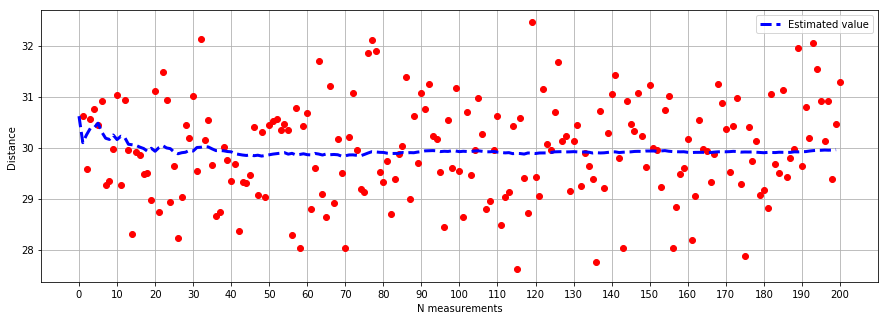

In [3]:
######## input data ###########
nMeasurements = 200


measuredDistance = trueDistance + oneSigma * np.random.randn(nMeasurements)
x = np.full(nMeasurements, trueDistance)

estimates = np.empty(nMeasurements)
nIndex = 1;
estimate = initialGuess
for m in measuredDistance:
    estimate = update(estimate, 1/nIndex, m)
    estimates[nIndex-1] = estimate
    nIndex = nIndex + 1

plt.plot(np.arange(1, nMeasurements+1, 1.0), measuredDistance, 'ro')
plt.plot(estimates, color='blue', linewidth=3, label='Estimated value', linestyle='--')
plt.xlabel('N measurements')
plt.ylabel('Distance')
plt.xticks(np.arange(0, nMeasurements+1, 10))
plt.grid(True)
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)